In [5]:
import sys
import os
import pandas as pd 
import numpy as np 
import sklearn
from sklearn.externals import joblib
import matplotlib.pyplot as plt  

In [18]:
class Model():
    """original model"""
    def __init__(self,id,logging_time):
        self.basePath=str(id)+'\\'+str(logging_time)
    def print(self):
        print(self.basePath)

class StyleBoxfileModel(Model):
    """docstring for StyleBoxfileModel"""
    def __init__(self, id,logging_time,arg):
        super().__init__(id,logging_time)
        self.filePath=str(arg)
    def print(self):
        print(self.basePath+'\\'+self.filePath)

In [19]:
p=Model(100,2018)

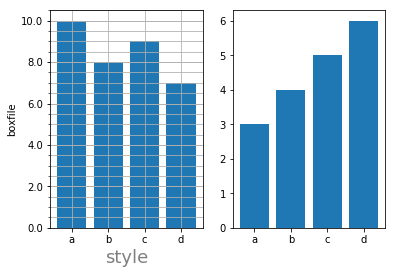

In [19]:
%matplotlib inline
x=['a','b','c','d']
y1=[10,8,9,7]
y2=[3,4,5,6]

from matplotlib.ticker import MultipleLocator, FormatStrFormatter


ymajorLocator   = MultipleLocator(2) #将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式
yminorLocator   = MultipleLocator(0.5) #将此y轴次刻度标签设置为0.1的倍数

ax1 = plt.subplot(121)
ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)

ax1.yaxis.set_minor_locator(yminorLocator)
ax1.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度

plt.xlabel('style',fontsize=18,alpha=0.5)
plt.ylabel('boxfile')
plt.bar(x,y1)
plt.grid()

ax2 =plt.subplot(122)
plt.bar(x,y2)

plt.show()

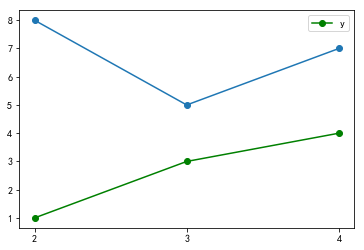

In [96]:
x1=[1,2,3]
y1=[1,3,4]
y2=[8,5,7]

_xticks_labels = [str(i+1) for i in x1]
plt.xticks(x1,_xticks_labels)
plt.plot(x1,y1,'go-',label='x')
plt.plot(x1,y2,'o-',label='y')
plt.show()

In [105]:
class YearBoxfileModel(Model):
    """docstring for YearBoxfileModel"""
    '''
    new=YearBoxfileModel(id,logging_time,options) : setup this model
    new.process() : 返回一个生成文件的路径列表，包含所有要生成的可视化图表
    '''
    def __init__(self, id, logging_time, options):
        '''
        params: id: user_id
                logging_time: user latest logging time
                options: user's choice for visualization (type:dict)
                         {'years': example:[2018,2017,...],
                          'visual_option':['line'],}
        '''
        super().__init__(id,logging_time)
        self.options=options
        self.years=options['years']
        self.visual_option=options['visual_option']

    def extract_data(self):
        self.data=OrderedDict()
        for YEAR in self.years:
            chart=pd.read_csv('data\\data_{}.csv'.format(YEAR))
            self.data[YEAR]=chart

    def analyse(self):
        '''
        self.statics: {2018:[spring_box, summer_box, fall_box, winter_box}]...}
        '''
        statics=OrderedDict()        
        for YEAR,YEAR_DATA in self.data.items():
            boxfile = [0.0, 0.0, 0.0, 0.0]
            for i in range(YEAR_DATA.shape[0]):
                film = YEAR_DATA.iloc[i]
                if film['month'] in [3,4,5]:
                    boxfile[0] += film['boxfile']
                elif film['month'] in [6,7,8]:
                    boxfile[1] += film['boxfile']
                elif film['month'] in [9,10,11]:
                    boxfile[2] += film['boxfile']
                elif film['month'] in [12,1,2]:
                    boxfile[3] += film['boxfile']
            statics[YEAR] = boxfile
        return statics

    def visual_line(self,data,savePath):
        ticks=self.years
        x=list(range(1,len(self.years)+1))
        _xticks_labels=['spring','summer','fall','winter']
        for YEAR in self.years:
            y = data[YEAR]
            plt.xticks(x,_xticks_labels)
            plt.plot(x,y,'o-',label=str(YEAR))
        plt.legend([str(YEAR) for YEAR in self.years])
        plt.xlabel('Boxfile Change Trend by seasons')
        plt.ylabel('Boxfile (in Million)')
        plt.savefig(savePath)
        print(savePath +' stored successfully')


    def visualization(self):
        data=self.analyse()
        savePaths=[]
        years = '_'.join([str(YEAR) for YEAR in self.years])
        for choice in self.visual_option:
            if choice == 'line':
                fileName='YearBoxfile_'+years+'_line.png'
                savePath=os.path.join(self.basePath,fileName)
                self.visual_line(data,savePath)
                savePaths.append(savePath)
        return savePaths

    def process(self):
        self.extract_data()
        return self.visualization()

Users\100\2018_12_05\YearBoxfile_2015_2016_2017_2018_line.png stored successfully


['Users\\100\\2018_12_05\\YearBoxfile_2015_2016_2017_2018_line.png']

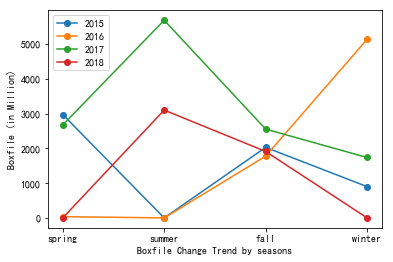

In [106]:
options={'years':[2015,2016,2017,2018],'visual_option':['line']}
new=YearBoxfileModel(100,'2018_12_05',options)
new.process()

Users\100\2018_12_05\TopFilm_2017_histogram.png stored successfully


['Users\\100\\2018_12_05\\TopFilm_2017_histogram.png']

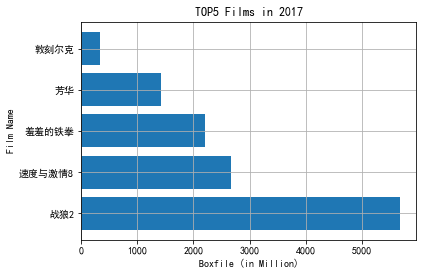

In [159]:
options={'year':2017,'visual_option':['histogram'],'top':5,'sort_by':'boxfile'}
new=TopFilmModel(100,'2018_12_05',options)
new.process()

In [78]:
"""Docs Instruction"""
'''
返回路径说明：

*文件基址basement为： Users\\(UserID)\\(logging Time)
    1.StyleBoxfileModel:
        饼状图pie:   StyleBoxfile_2016_fall_9_pie.png / StyleBoxfile_2016_fall_pie.png / StyleBoxfile_2016_pie.png
        柱状图histo: StyleBoxfile_2016_fall_9_histogram.png / StyleBoxfile_2016_fall_histogram.png

    2.YearBoxfileModel:
        折线图line:  YearBoxfile_2015_2016_2017_line.png (中间年份可多选，以_作为分割符号)

    3.TopFilmModel：
        词云图cloud: TopFilm_2016_cloud.png (中间年份为单一年份)
        柱状图histo: TopFilm_2016_histogram.png 

    4.TopActorModel:
        词云图cloud: TopActor_2016_cloud.png (中间年份为单一年份)
        柱状图histo: TopActor_2016_histogram.png 
'''

import sys
import os
import pandas as pd 
import numpy as np 
import sklearn
from sklearn.externals import joblib
import matplotlib.pyplot as plt 
from collections import OrderedDict
from scipy.misc import imread
import wordcloud
from PIL import Image

from utils import NoValuableDataException

class Model():
    """original model"""
    def __init__(self,id,logging_time):
        self.basePath='Users\\'+str(id)+'\\'+str(logging_time)
        if not os.path.exists(self.basePath):
            os.makedirs(self.basePath)
    def print(self):
        pass

class StyleBoxfileModel(Model):
    """docstring for StyleBoxfileModel"""
    '''
    new=StyleBoxfileModel(id,logging_time,options) : setup this model
    new.process() : 返回一个生成文件的路径列表，包含所有要生成的可视化图表
    '''
    def __init__(self, id, logging_time, options):
        '''
        params: id: user_id
                logging_time: user latest logging time
                options: user's choice for visualization (type:dict)
                         {'time':[year,season,month],
                          'visual_option':['pie'，'histogram'],
                          'sort_by':['boxfile','score'],}
        '''
        super().__init__(id,logging_time)
        self.options=options
        self.time=options['time']
        self.visual_option=options['visual_option']
        self.sort_by=options['sort_by']

    def extract_keywords(self):
        self.YEAR=self.time[0]#could be None
        self.SEASON=self.time[1]#could be None
        self.MONTH=self.time[2]#could be None

    def extract_data(self):
        chart=pd.read_csv('data\\data_{}.csv'.format(self.YEAR),encoding='GBK')
        if self.SEASON is not None and self.MONTH is not None:
            self.chart = chart[chart['month']==self.MONTH]
        elif self.SEASON is not None and self.MONTH is None:
            if self.SEASON.lower() == 'spring':
                months=[1,2,3]
            elif self.SEASON.lower() == 'summer':
                months=[4,5,6]
            elif self.SEASON.lower() == 'fall':
                months = [7,8,9]
            elif self.SEASO.lower() == 'winter':
                months = [10,11,12]
            self.chart = chart[chart['month'].isin(months)]
        elif self.SEASON is None and self.MONTH is None:
            self.chart=chart
        
        if self.chart.shape[0]==0:
            raise(NoValuableDataException())

    def analyse(self):
        #style_dict:{style:{counts:XX, boxfile:XX,prop:XX},...}
        style_dict=OrderedDict()
        for i in range(self.chart.shape[0]):
            film=self.chart.iloc[i]
            styles=film['genre'].split(',')
            for style in styles:
                if style not in style_dict:
                    style_dict[style]={}
                    style_dict[style]['counts']=1
                    style_dict[style]['boxfile']=film['boxfile']
                else:
                    style_dict[style]['counts']+=1
                    style_dict[style]['boxfile']+=film['boxfile']

        sumBoxFile = 0.0
        for style in style_dict.keys():
            sumBoxFile+=style_dict[style]['boxfile']
        for style in style_dict.keys():
            style_dict[style]['prop'] = style_dict[style]['boxfile'] / sumBoxFile
        return style_dict


    def visual_pie(data,path):
        '''
        params: data(dict)
                path: where to store the generated imgs
        '''
        plt.rcParams['font.sans-serif']=['SimHei']
        plt.figure()
        ax = plt.subplot(111,facecolor='#3D3D3D')
        labels = list(data.keys())
        sizes = [data[style]['prop'] for style in data.keys()]
        explode = (0.1,)*len(labels)
        plt.title('Proportions of Different Genres of Films')
        plt.pie(sizes,explode=explode,labels=labels,autopct='%1.2f%%',shadow=True,startangle=150)
        plt.savefig(path)
        print(path+' stored successfully')

    def visual_histo(data,path):
        plt.rcParams['font.sans-serif']=['SimHei']
        x = list(data.keys())
        y = [data[style]['boxfile'] for style in data.keys()]

        plt.figure()
        ax = plt.subplot(111,facecolor='#3D3D3D')
        plt.bar(x,y,color=['#ff7777','#89ffec','#9effad','#fff787'],alpha=0.9)
        plt.title('Boxfile of Different Genres of Films')
        plt.xlabel('Different Genres Of Films')
        plt.ylabel('Boxfile (in Million)')
        # from matplotlib.ticker import MultipleLocator, FormatStrFormatter
        # ymajorLocator   = MultipleLocator(10000)
        # ymajorFormatter = FormatStrFormatter('%1.1f') 
        # yminorLocator   = MultipleLocator(100)
        # ax1.yaxis.set_major_locator(ymajorLocator)
        # ax1.yaxis.set_major_formatter(ymajorFormatter)
        # ax1.yaxis.set_minor_locator(yminorLocator)
        # ax1.yaxis.grid(True, which='minor')
        # plt.grid()
        plt.savefig(path)
        print(path+' stored successfully')


    def visualization(self):
        data = self.analyse()
        savePaths=[]
        time=[str(i) for i in self.time if i is not None]
        time='_'.join(time)
        for choice in self.visual_option:
            if choice == 'pie':
                fileName='StyleBoxfile_'+time+'_pie.png'
                savePath=os.path.join(self.basePath,fileName)
                StyleBoxfileModel.visual_pie(data,savePath)
                savePaths.append(savePath)

            elif choice == 'histogram':
                fileName='StyleBoxfile_'+time+'_histogram.png'
                savePath=os.path.join(self.basePath,fileName)
                StyleBoxfileModel.visual_histo(data,savePath)
                savePaths.append(savePath)
        return savePaths


    def process(self):
        '''主流程'''
        self.extract_keywords()
        # 如果没有选择项中的日期，返回地址为空列表
        try:
            self.extract_data()
        except:
            print('Sorry,No Valuable Data! ')
            return []
        return self.visualization()


class YearBoxfileModel(Model):
    """docstring for YearBoxfileModel"""
    '''
    new=YearBoxfileModel(id,logging_time,options) : setup this model
    new.process() : 返回一个生成文件的路径列表，包含所有要生成的可视化图表
    '''
    def __init__(self, id, logging_time, options):
        '''
        params: id: user_id
                logging_time: user latest logging time
                options: user's choice for visualization (type:dict)
                         {'years': example:[2018,2017,...],
                          'visual_option':['line'],}
        '''
        super().__init__(id,logging_time)
        self.options=options
        self.years=options['years']
        self.visual_option=options['visual_option']

    def extract_data(self):
        self.data=OrderedDict()
        for YEAR in self.years:
            chart=pd.read_csv('data\\data_{}.csv'.format(YEAR),encoding='GBK')
            self.data[YEAR]=chart

    def analyse(self):
        '''
        self.statics: {2018:[spring_box, summer_box, fall_box, winter_box}]...}
        '''
        statics=OrderedDict()        
        for YEAR,YEAR_DATA in self.data.items():
            boxfile = [0.0, 0.0, 0.0, 0.0]
            for i in range(YEAR_DATA.shape[0]):
                film = YEAR_DATA.iloc[i]
                if film['month'] in [1,2,3]:
                    boxfile[0] += film['boxfile']
                elif film['month'] in [4,5,6]:
                    boxfile[1] += film['boxfile']
                elif film['month'] in [7,8,9]:
                    boxfile[2] += film['boxfile']
                elif film['month'] in [10,11,12]:
                    boxfile[3] += film['boxfile']
            statics[YEAR] = boxfile
        return statics

    def visual_line(self,data,savePath):
        ticks=self.years
        x=list(range(1,5))
        _xticks_labels=['spring','summer','fall','winter']

        plt.figure()
        ax = plt.subplot(111,facecolor='#3D3D3D')
        for YEAR in self.years:
            y = data[YEAR]
            plt.xticks(x,_xticks_labels)
            plt.plot(x,y,'o-',label=str(YEAR))
        plt.legend([str(YEAR) for YEAR in self.years])
        plt.xlabel('Boxfile Change Trend by seasons')
        plt.ylabel('Boxfile (in Million)')
        plt.savefig(savePath)
        print(savePath +' stored successfully')


    def visualization(self):
        data=self.analyse()
        savePaths=[]
        years = '_'.join([str(YEAR) for YEAR in self.years])
        for choice in self.visual_option:
            if choice == 'line':
                fileName='YearBoxfile_'+years+'_line.png'
                savePath=os.path.join(self.basePath,fileName)
                self.visual_line(data,savePath)
                savePaths.append(savePath)
        return savePaths

    def process(self):
        self.extract_data()
        return self.visualization()



class TopFilmModel(Model):
    """docstring for TopFilmModel"""
    '''
    new=YearBoxfileModel(id,logging_time,options) : setup this model
    new.process() : 返回一个生成文件的路径列表，包含所有要生成的可视化图表
    '''
    def __init__(self, id, logging_time, options):
        '''
        params: id: user_id
                logging_time: user latest logging time
                options: user's choice for visualization (type:dict)
                         {'year': a single year(int),
                          'top': int,
                          'visual_option':['cloud','histogram'],
                          'sort_by':('boxfile' or 'score')}
        '''
        super().__init__(id,logging_time)
        self.options=options
        self.YEAR=options['year']
        self.TOP=options['top']
        self.visual_option=options['visual_option']
        self.sort_by=options['sort_by']

    def extract_data(self):
        chart=pd.read_csv('data\\data_{}.csv'.format(self.YEAR),encoding='GBK')
        if self.sort_by == 'boxfile':
            data = chart.sort_values(by='boxfile',ascending=False)
            std_sorted=list(data.boxfile)
        elif self.sort_by == 'score':
            data = chart.sort_values(by='score',ascending=False)
            std_sorted=list(data.score)
        name_sorted = list(data.name)
        self.data = [name_sorted,std_sorted]
        

    def visual_cloud(self,savePath):
        names = self.data[0][:self.TOP]
        names = ' '.join(names)        
        font = r'C:\\Windows\\Fonts\\simhei.ttf'
#         导入词图背景
        mask = imread('image\\bgd.jpg') 
        wc = wordcloud.WordCloud(background_color=(61,61,61),mask=mask,font_path=font).generate(names)
        wc.to_file(savePath)
        plt.imshow(wc)
        plt.axis('off')
        print(savePath+' successfully stored')

    def visual_histo(self,savePath):
        names = self.data[0][:self.TOP]
        boxfiles = self.data[1][:self.TOP]

        plt.rcParams['font.sans-serif']=['SimHei']
        plt.figure()
        ax = plt.subplot(111,facecolor='#3D3D3D')
        plt.barh(names,boxfiles,color=['#ff7777','#89ffec','#9effad','#fff787'],alpha=0.9)
        plt.title('TOP{} Films in {}'.format(self.TOP,self.YEAR))
        plt.xlabel('Boxfile (in Million)')
        plt.ylabel('Film Name')
        # from matplotlib.ticker import MultipleLocator, FormatStrFormatter
        # xmajorLocator   = MultipleLocator(10000)
        # xmajorFormatter = FormatStrFormatter('%1.1f') 
        # xminorLocator   = MultipleLocator(100)
        # ax.xaxis.set_major_locator(xmajorLocator)
        # ax.xaxis.set_major_formatter(xmajorFormatter)
        # ax.xaxis.set_minor_locator(xminorLocator)
        # ax.xaxis.grid(True, which='minor')
#         plt.grid()
        plt.savefig(savePath)
        print(savePath+' stored successfully')

    def visualization(self):
        savePaths=[]
        for choice in self.visual_option:
            if choice == 'cloud':
                fileName='TopFilm_'+str(self.YEAR)+'_cloud.png'
                savePath=os.path.join(self.basePath,fileName)
                self.visual_cloud(savePath)
                savePaths.append(savePath)
            elif choice == 'histogram':
                fileName='TopFilm_'+str(self.YEAR)+'_histogram.png'
                savePath=os.path.join(self.basePath,fileName)
                self.visual_histo(savePath)
                savePaths.append(savePath)
        return savePaths

    def process(self):
        self.extract_data()
        return self.visualization()

class TopActorModel(Model):
    """docstring for TopActorModel"""
    '''
    new=TopActorModel(id,logging_time,options)
    new.process(): 返回一个生成文件的路径列表，包含所有要生成的可视化图表
    '''
    def __init__(self, id, logging_time, options):
        '''
        params: id: user_id
                logging_time: user latest logging time
                options: user's choice for visualization (type:dict)
                         {'year': a single year(int),
                          'top': int,
                          'sex': 'male'or'female'
                          'visual_option':['cloud','histogram']}
        '''
        super().__init__(id, logging_time)
        self.options = options
        self.YEAR = options['year']
        self.TOP = options['top']
        self.SEX = options['sex']
        self.visual_option = options['visual_option']

    def extract_data(self):
        # total_actors=pd.read_csv('data\\actors.csv',header=None)
        # total_actors=list(total_actors[0])
        chart=pd.read_csv('data\\data_{}.csv'.format(self.YEAR),encoding='GBK')
        #data为统计的某一年所有演员的参演信息
        data={}
        for i in range(chart.shape[0]):
            entry=chart.iloc[i]
            actors=entry['actor'].split(',')
            for actor in actors:
                if actor not in data:
                    data[actor]=1
                else:
                    data[actor]+=1
        self.data=OrderedDict(sorted(data.items(),key=lambda x:x[1]),reverse=True)

    def visual_cloud(self,savePath):
        names = list(self.data.keys())[:self.TOP]
        joinFilms=list(self.data.values())[:self.TOP]
        names = ' '.join(names)
        
        font = r'C:\\Windows\\Fonts\\simhei.ttf'
#         导入词图背景
        mask = imread('image\\bgd.jpg') 
        wc = wordcloud.WordCloud(background_color=(61,61,61),mask=mask,font_path=font).generate(names)
        wc.to_file(savePath)
        plt.imshow(wc)
        plt.axis('off')
        print(savePath+' successfully stored')

    def visual_histo(self,savePath):
        names = list(self.data.keys())[:self.TOP]
        joinFilms=list(self.data.values())[:self.TOP]

        plt.rcParams['font.sans-serif']=['SimHei']
        plt.figure()
        ax = plt.subplot(111,facecolor='#3D3D3D')
        plt.barh(names,joinFilms,color=['#ff7777','#89ffec','#9effad','#fff787'],alpha=0.9)
        plt.title('TOP{} Actors in {}'.format(self.TOP,self.YEAR))
        plt.xlabel("Join Films")
        plt.ylabel("Actors' Name")
        # from matplotlib.ticker import MultipleLocator, FormatStrFormatter
        # xmajorLocator   = MultipleLocator(10000)
        # xmajorFormatter = FormatStrFormatter('%1.1f') 
        # xminorLocator   = MultipleLocator(100)
        # ax.xaxis.set_major_locator(xmajorLocator)
        # ax.xaxis.set_major_formatter(xmajorFormatter)
        # ax.xaxis.set_minor_locator(xminorLocator)
        # ax.xaxis.grid(True, which='minor')
        # plt.grid()
        plt.savefig(savePath)
        print(savePath+' stored successfully')


    def visualization(self):
        savePaths=[]
        for choice in self.visual_option:
            if choice == 'cloud':
                fileName='TopActor_'+str(self.YEAR)+'_cloud.png'
                savePath=os.path.join(self.basePath,fileName)
                self.visual_cloud(savePath)
                savePaths.append(savePath)
            elif choice == 'histogram':
                fileName='TopActor_'+str(self.YEAR)+'_histogram.png'
                savePath=os.path.join(self.basePath,fileName)
                self.visual_histo(savePath)
                savePaths.append(savePath)
        return savePaths

    def process(self):
        self.extract_data()
        return self.visualization()

Users\100\2018_12_05\StyleBoxfile_2018_spring_pie.png stored successfully


['Users\\100\\2018_12_05\\StyleBoxfile_2018_spring_pie.png']

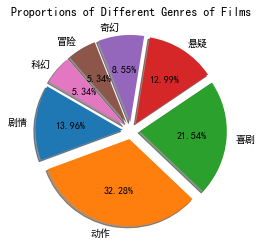

In [65]:
options={'visual_option':['pie'],'time':[2018,'spring',None],'sort_by':['boxfile']}
new=StyleBoxfileModel(100,'2018_12_05',options)
new.process()

Users\100\2018_12_05\YearBoxfile_2015_2016_2017_2018_line.png stored successfully


['Users\\100\\2018_12_05\\YearBoxfile_2015_2016_2017_2018_line.png']

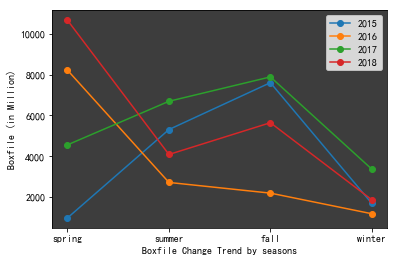

In [75]:
options={'years':[2015,2016,2017,2018],'visual_option':['line']}
new=YearBoxfileModel(100,'2018_12_05',options)
new.process()

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:307: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Users\100\2018_12_05\TopFilm_2016_cloud.png successfully stored


['Users\\100\\2018_12_05\\TopFilm_2016_cloud.png']

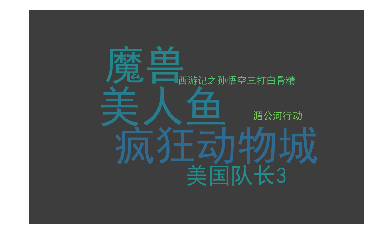

In [79]:
options={'year':2016,'visual_option':['cloud'],'top':6,'sort_by':'boxfile'}
new=TopFilmModel(100,'2018_12_05',options)
new.process()

Users\100\2018_12_05\TopActor_2016_histogram.png stored successfully


['Users\\100\\2018_12_05\\TopActor_2016_histogram.png']

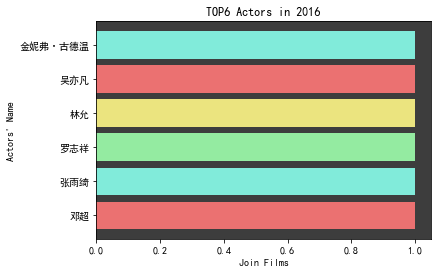

In [81]:
options={'year':2016,'visual_option':['histogram'],'top':6,'sex':'male'}
new=TopActorModel(100,'2018_12_05',options)
new.process()

In [98]:
def combine_years(years,combined_data_path):
	'''
	params: years(list of years)
			combined_data_path(target path for storing combined_data)
	'''
	combined_data=pd.read_csv('data\\data_{}.csv'.format(years[0]),encoding='GBK')
	for year in years[1:]:
		year_df=pd.read_csv('data\\data_{}.csv'.format(year),encoding='GBK')
		combined_data=pd.concat([combined_data,year_df],ignore_index=True)
	combined_data.to_csv(combined_data_path,index=False)

In [99]:
combine_years([2015,2016,2017,2018],'data\\data.csv')